<a href="https://colab.research.google.com/github/jnragu/ee608_exam2/blob/main/Exam2_EE608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

Solve the following steepest descent algorithm. 

$$
\text{minimize } f(x) = (x_1 + 5)^2 + (x_2 + 8)^2 + (x_3 + 7)^2 + 2x_1^2x_2^2 + 4x_1^2x_3^2
$$


In [1]:
import numpy as np

np.random.seed(0)

x = np.random.uniform(low = -100.0, high = 100.0, size = (100, 3))

def f(x1, x2, x3):
  return (x1 + 5)**2 + (x2 + 8)**2 + (x3 + 7)**2 + 2 * x1**2 * x2**2 + 4 * x1**2 * x2**2

f = np.vectorize(f)

A search for a stationary point can be viewed as an iterative procedure of generating a point $\pmb{x}^{(k+1)}$ which takes steps of certain length $t_k$ at direction $\Delta\pmb{x}^{(k)}$ from the previous point $\pmb{x}^{(k})$.

The direction $\Delta\pmb{x}^{(k)}$  decides which direction to search next, and the step size determines how far we go in that direction. 

The update rule can be written as
$$
\pmb{x}^{(k+1)} = x^{(k)} + t_k\Delta\pmb{x}^{(k)}
$$

Given a particular point $\pmb{x}$, we need to find the steepest direction such that $f(\pmb{x} + \pmb{d})$ is minimized. 

Approximating the function using first-order Taylor expansion
$$
  f(\pmb{x} + \pmb{d}) \approx f(\pmb{x}) + \nabla f(\pmb{x})^T \pmb{d}
$$

The direction $\pmb{b}$ that minimizes $f(\pmb{x} + \pmb{d})$ is

$$
\min_{\pmb{d}: \lVert v \rVert = 1} \nabla f(\pmb{x}^T d )
$$

Using $\ell_2$ norm the steepest direction is
$$
d^* = \frac{\nabla f(\pmb{x})}{\lVert \nabla f(\pmb{x}) \rVert}
$$

At each iteration, to minimize the function, $\pmb{x}$ will be updated as

$$
\pmb{x}^{(k+1)} = x^{(k)} - t_k \nabla f (\pmb{x}^{(k)})
$$


The steepest descent algorithm
```
Guess x_0, set $k <- 0$
  while norm(gradient(f(x_k))) >= epsilon do
    x_k+1 = x_k + t_k * gradient(f(x_k))
    k = k + 1
```
### First derivative
$$
\begin{align*}
	f(x) &= (x_1 + 5)^2 + (x_2 + 8)^2 + (x_3 + 7)^2 + 2x_1^2x_2^2 + 4x_1^2x_3^2 \\
  \frac{\delta f}{\delta x_1} &= 2(2x_1x_2^2 + 4x_1x_3^2 + x_1 + 5) \\
  \frac{\delta f}{\delta x_2} &= 2(2x_1^2x_2 + x_2 +8 ) \\
  \frac{\delta f}{\delta x_3} & = 2(4x_1^2x_3 + x_3 +7)
\end{align*}
$$

### Hessian
$$
\begin{equation}
H(x) = \begin{bmatrix}
	4x_2^2 + 8x_3^2 & 8x_1x_2 & 16x_1x_3 \\
  8x_1x_2  & 4x_1^2+2 & 0 \\
  16x_1x_3 & 0 & 8x_1^2+2
\end{bmatrix}
\end{equation}
$$

In [2]:
def partial_x1(x1, x2, x3):
  return 2 * (2 * x1 * x2**2 + 4 * x1 * x3**2 + x1 + 5)

def partial_x2(x1, x2, x3):
  return 2 * (2 * x1**2 * x2 + x2 + 8)

def partial_x3(x1, x2, x3):
  return 2 * (4 * x1**2 * x3 + x3 +7)

def compute_gradient(x1, x2, x3):
  dx1 = partial_x1(x1, x2, x3)
  dx2 = partial_x2(x1, x2, x3)
  dx3 = partial_x3(x1, x2, x3)

  return np.array([dx1, dx2, dx3])

def unpack(x):
  return x[0], x[1], x[2]

In [10]:
def l2_norm(x1, x2, x3):
  gradient = compute_gradient(x1, x2, x3)
  return np.linalg.norm(gradient)

def steepest_descent_iteration(x, alpha):
  x1, x2, x3 = unpack(x)
  gradient = compute_gradient(x1, x2, x3)  
  new_x = x - alpha * gradient
  return new_x

def run_steepest_descent(x, alpha, epsilon):
  x1, x2, x3 = unpack(x)
  l2_norms = []
  iterations = 1
  
  gradient = compute_gradient(x1, x2, x3)
  norm = l2_norm(x1, x2, x3)
  l2_norms.append(norm)

  while norm >= epsilon:
    x = steepest_descent_iteration(x, alpha)
    norm = l2_norm(x[0], x[1], x[2])
    l2_norms.append(norm)
    iterations += 1
  return x, iterations, l2_norms

In [12]:
x = np.array([1, 1, 1])
epsilon = 1e-6
alpha = 0.0001

x, iterations, l2_norms = run_steepest_descent(x, alpha, epsilon)
x

array([-0.015408  , -7.99620293, -6.99335859])

## Part (a): Verify  that the final solution satisfies the second order necessary conditions for a minimum. 

The Hessian must be a positive semidefinite.


In [19]:
def compute_Hessian(x1, x2, x3):
  H = np.array([[4 * x2**2 + 8 * np.square(x3) + 2, 8 * x1 * x2, 16 * x1 * x3],
            [8 * x1 * x2, 4 * x1**2 + 2, 0 ],
            [16 * x1 * x3, 0, 8 * x1**2 + 2]])
  return H

In [21]:
H = compute_Hessian(x[0], x[1], x[2])
np.linalg.cholesky(H)

array([[ 2.54757445e+01,  0.00000000e+00,  0.00000000e+00],
       [ 3.86895019e-02,  1.41402007e+00,  0.00000000e+00],
       [ 6.76745107e-02, -1.85166616e-03,  1.41326430e+00]])

H is a positive semidefinite, therefore the second order necessary conditions for a minimum are satisfied.

## Part (b): Plot the value of the objective function with respect to the number of iterations


Text(0.5, 1.0, 'Objective function with respect to number of iterations')

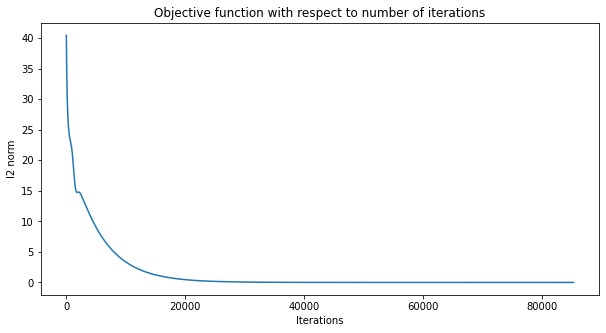

In [34]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

df = pd.DataFrame(data = l2_norms, columns = ['l2 norm'])
df['Iterations'] = np.arange(1, iterations + 1)

plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'Iterations', y = 'l2 norm')
plt.title('Objective function with respect to number of iterations')

## Part (c) Comment on the convergence speed of the algorithm

# Problem 2: Consider the problem
$$
\begin{align*}
	\min{f(x)} \ &\text{ such that } h(x) \geq 0 \\
&\text{where } \ f(x) = (x_1-1)^2 + 2(x_2 - 2)^2 \\
&\text{and } \ h(x) = \begin{bmatrix}
	1 - x_1^2 - x_2^2 \\
  x_1 + x_2
\end{bmatrix}
\end{align*}
$$

## Part (a): Plot the contour plot of $f(x)$ and the feasible set on one single figure, i.e., overlay the feasible set on the contour plot of $f(x)$. 

## Part (b): Find a solution to the problem using the natural logarithmic barrier function

The barrier function is 
$$
\log{h_1(x)} - \log{h_2(x)}
$$
Use initialization vector $\begin{bmatrix}
	0.5 \\ 0.5
\end{bmatrix}$
The initial penalty parameter equal to $1$.

Reduce the penalty parametery by $\frac{1}{2}$ in each iteration. 

Use a stopping threshold of $0.002$.

## Part (c): In a 2-D figure, plot the trajectory (i.e., the values connected by lines with arrows) of the computed solution vector as the number of iteration progresses. 

# Problem 3: Collect the stock price for Tesla (NASDAQ: TSLA) for the past 30 days. 

## Part (a): Plot the data (date vs. stock price)

## Part (b): Implement the stochastic gradient descent algorithm to fit a linear regression model for this data set. 


## Part (c): Plot the raw data and your linear regression model for visual comparison 

## Part (d): What does your model predict for Tesla's stock price for the next three months into the future?

## Part (e): Explain the pros and cons of gradient descent and stochastic gradient descent. 